<a href="https://colab.research.google.com/github/Ynsuk/intermidiate/blob/main/3_8_RNN_Text_ipynb_YNSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>RNN, Text 데이터 다루기</h1>

# import

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# Keras Tokenization API
* `tokenizer = keras.preprocessing.text.Tokenizer(num_words, filters, lower, split, char_level, oov_token, document_count)`
  * 텍스트 Tokenizing 도구
  * parameter
      * `num_words=None` : 보관할 단어 최대 갯수
      * `filters=rgex` : 토큰에서 제외한 규칙, 정규 표현식
      * `lower=True` : 소문자로 변형 여부
      * `split=" "` : 단어 분리 문자
      * `char_level=False` : 글자단위 토큰 여부
      * `oov_token=None` : out-of-voca 단어 
  * methods
    * `fit_on_texts(text)` : 주어진 `text`로 voca를 갱신한다.
    * `fit_on_sequence(seqence)` : 주어진 문장으로 voca를 갱신한다.
    * `texts_to_sequences(texts)`: 주어진 `texts`의 각각의 토큰을 숫자로 변환
* `keras.preprocessing.sequence.pad_sequences(seq)` : 가장긴 길이에 마줘서 패딩
* `keras.preprocessing.sequence.skipgrams(seq)`: 


## char 단위 Tokenizing

In [ ]:
samples = ['The cat sat on the mat']

char_tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
char_tokenizer.fit_on_texts(samples)
print("config:",char_tokenizer.get_config())
print("word_index:", char_tokenizer.word_index)

char_seq = char_tokenizer.texts_to_sequences(samples)
print("char txt2seq:", char_seq)

char_one_hot = tf.keras.utils.to_categorical(char_seq)
print("one-hot:", char_one_hot)
print(char_tokenizer.index_word[4])

config: {'num_words': None, 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', 'lower': True, 'split': ' ', 'char_level': True, 'oov_token': None, 'document_count': 1, 'word_counts': '{"t": 5, "h": 2, "e": 2, " ": 5, "c": 1, "a": 3, "s": 1, "o": 1, "n": 1, "m": 1}', 'word_docs': '{"m": 1, "a": 1, "s": 1, "t": 1, "e": 1, "h": 1, "n": 1, "o": 1, "c": 1, " ": 1}', 'index_docs': '{"10": 1, "3": 1, "7": 1, "1": 1, "5": 1, "4": 1, "9": 1, "8": 1, "6": 1, "2": 1}', 'index_word': '{"1": "t", "2": " ", "3": "a", "4": "h", "5": "e", "6": "c", "7": "s", "8": "o", "9": "n", "10": "m"}', 'word_index': '{"t": 1, " ": 2, "a": 3, "h": 4, "e": 5, "c": 6, "s": 7, "o": 8, "n": 9, "m": 10}'}
word_index: {'t': 1, ' ': 2, 'a': 3, 'h': 4, 'e': 5, 'c': 6, 's': 7, 'o': 8, 'n': 9, 'm': 10}
char txt2seq: [[1, 4, 5, 2, 6, 3, 1, 2, 7, 3, 1, 2, 8, 9, 2, 1, 4, 5, 2, 10, 3, 1]]
one-hot: [[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 

## word 단위 tokenizing

In [ ]:
from tensorflow import keras
samples = ['The cat sat on the mat']

tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
display("config:",tokenizer.get_config())
print("word_index:", tokenizer.word_index)

word_sequence = tokenizer.texts_to_sequences(samples)
print("word txt2seq:", word_sequence)
word_one_hot = keras.utils.to_categorical(word_sequence)
print("one-hot:", word_one_hot)


'config:'

{'char_level': False,
 'document_count': 1,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'index_docs': '{"4": 1, "1": 1, "2": 1, "5": 1, "3": 1}',
 'index_word': '{"1": "the", "2": "cat", "3": "sat", "4": "on", "5": "mat"}',
 'lower': True,
 'num_words': None,
 'oov_token': None,
 'split': ' ',
 'word_counts': '{"the": 2, "cat": 1, "sat": 1, "on": 1, "mat": 1}',
 'word_docs': '{"on": 1, "the": 1, "cat": 1, "mat": 1, "sat": 1}',
 'word_index': '{"the": 1, "cat": 2, "sat": 3, "on": 4, "mat": 5}'}

word_index: {'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5}
word txt2seq: [[1, 2, 3, 4, 1, 5]]
one-hot: [[[0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1.]]]


# 다음 글자 예측 실습


## 입출력 데이타 준비

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

sentence = ["hihello"]

tknzr = Tokenizer(char_level=True)
tknzr.fit_on_texts(sentence)
print('word_index:', tknzr.word_index)
seq = np.array(tknzr.texts_to_sequences(sentence))
print('sequence:', seq)

x = seq[:, :-1]
y = seq[:, 1:]
print('x:', x, 'y:', y)

n_steps = x.shape[1]
n_class = len(tknzr.word_index)+1
print('n_steps:', n_steps, 'n_class:', n_class)

x_enc = to_categorical(x, num_classes=n_class)
print("x_enc:", x_enc, x_enc.shape, )

word_index: {'h': 1, 'l': 2, 'i': 3, 'e': 4, 'o': 5}
sequence: [[1 3 1 4 2 2 5]]
x: [[1 3 1 4 2 2]] y: [[3 1 4 2 2 5]]
n_steps: 6 n_class: 6
x_enc: [[[0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]]] (1, 6, 6)


## LSTM을 이용한 모델 학습 및 테스트

In [ ]:
hidden_size = 10 #output size
model = tf.keras.Sequential([
      tf.keras.layers.LSTM(hidden_size, input_shape=(n_steps, n_class), return_sequences=True),
      tf.keras.layers.Dense(n_class, activation='softmax')
])
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

n_epochs = 1000
history = model.fit(x_enc, np.reshape(y, (1,6,1)), epochs=n_epochs, verbose=0)

y_pred = model.predict(x_enc)
print('y_pred:', y_pred)
y_pred_idx = np.squeeze(np.argmax(y_pred, axis=2))
print('y_pred(argmax):', y_pred_idx)
print([tknzr.index_word[i] for i in y_pred_idx])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 6, 10)             680       
                                                                 
 dense_1 (Dense)             (None, 6, 6)              66        
                                                                 
Total params: 746
Trainable params: 746
Non-trainable params: 0
_________________________________________________________________
y_pred: [[[5.7421718e-03 2.3452571e-02 5.3279391e-03 9.3629783e-01 1.9000573e-02
   1.0178790e-02]
  [7.8225497e-04 9.7474164e-01 4.5772988e-04 1.5203463e-02 8.7899175e-03
   2.5012385e-05]
  [9.8489178e-04 8.7902453e-03 2.3918550e-02 6.2984708e-03 9.5987701e-01
   1.3084126e-04]
  [1.7277223e-04 1.3457400e-04 9.7978759e-01 4.7652517e-04 1.7886223e-02
   1.5423147e-03]
  [3.3343825e-04 3.2500408e-05 9.7863847e-01 2.2783989e-04 2.3670688e-03
   1.84

# 단어 자동 완성 실습
* 영문자 4개로 구성된 단어를 학습
* 3글자 입력, 1글자 추천

## 데이타 준비

In [ ]:
import tensorflow as tf
import numpy as np

seq_data = ['word', 'wood', 'deep', 'dive', 'cold', 'love', 'cool', 'load', 'kiss', 'kind']

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(seq_data)
#display(tokenizer.get_config())

seq = tokenizer.texts_to_sequences(seq_data)
print(seq_data[:2], seq[:2])

x = np.array(seq)[:, :-1]
y = np.array(seq)[:, -1]

x_enc = tf.keras.utils.to_categorical(x)
print('x_enc:\n',x_enc[:2])

['word', 'wood'] [[6, 1, 11, 2], [6, 1, 1, 2]]
x_enc:
 [[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


## 모델 구성 및 훈련

In [ ]:
hidden_size = 128
n_steps = 3
n_class = len(tokenizer.word_index)+1
print(tokenizer.word_counts)
model = tf.keras.Sequential([
  keras.layers.LSTM(hidden_size, input_shape=(n_steps, n_class), return_sequences=False),
  keras.layers.Dense(n_class, activation='softmax')
])
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

n_epochs = 1000
history = model.fit(x_enc, y, epochs=n_epochs, verbose=0)

preds = model.predict(x_enc)
print(preds, np.argmax(preds, axis=1))
print(f'prediction: {[tokenizer.index_word[i] for i in np.argmax(preds, axis=1)]}')
print(f'inputs : {tokenizer.sequences_to_texts(x)}')

OrderedDict([('w', 2), ('o', 8), ('r', 1), ('d', 7), ('e', 4), ('p', 1), ('i', 3), ('v', 2), ('c', 2), ('l', 4), ('a', 1), ('k', 2), ('s', 2), ('n', 1)])
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               73728     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
Total params: 90,240
Trainable params: 90,240
Non-trainable params: 0
_________________________________________________________________
[[1.1894848e-10 4.2249879e-10 9.9999285e-01 ... 3.1439751e-10
  4.5924045e-10 7.6013446e-10]
 [7.0573852e-10 2.2348259e-09 9.9983895e-01 ... 1.7480395e-09
  2.0820698e-09 3.6441237e-09]
 [7.4434659e-08 1.7202498e-07 8.8996152e-05 ... 1.2298446e-07
  2.5236696e-07 1.8288560e-07]
 ...
 [4.6318887e-09 1.4102213e-08 9.9813336e-01 ... 7.0046031e-09
  1.4975809e

# Token Embedding


## 긍정/부정 분류 실습 데이터 준비

In [ ]:
X = ['very good nice quality', 
          'stop lies',
          'ugly terrible', 
          'excellent work', 
          'adorable lovely', 
          'bad',
          'greate nice']
y = np.array([1, 0, 0, 1, 1, 0, 1]) #1 :pos, 0 : neg

tknizr = keras.preprocessing.text.Tokenizer()
tknizr.fit_on_texts(X)
vocab_size = len(tknizr.word_index) + 1
print(f'vocab_size : {vocab_size}')
X_enc = tknizr.texts_to_sequences(X)
print(f'X_enc: {X_enc}')
max_len=max(len(l) for l in X_enc)
print(f'max_len: {max_len}')
X_train = keras.preprocessing.sequence.pad_sequences(X_enc, padding='post')
#X_train = keras.preprocessing.sequence.pad_sequences(X_enc, maxlen=max_len, padding='post')
y_train = y
print(f'padded : {X_train}')

vocab_size : 15
X_enc: [[2, 3, 1, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 1]]
max_len: 4
padded : [[ 2  3  1  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14  1  0  0]]


## 모델 생성 및 학습

In [ ]:
tf.random.set_seed(3)
np.random.seed(0)
model = keras.Sequential([
  keras.layers.Embedding(vocab_size, 2, input_length=max_len, name='embedd'),
  keras.layers.Flatten(),
  keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=500, verbose=0)
model.evaluate(X_train, y_train)
embd = model.get_layer(name='embedd')
print(f'embedding vec:\n {embd(X_train)[:3]}')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedd (Embedding)          (None, 4, 2)              30        
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 129ms/step - loss: 0.1092 - acc: 1.0000
embedding vec:
 [[[-0.3672732  -0.34104872]
  [-0.39584816 -0.38182884]
  [-0.46173456 -0.64804894]
  [ 0.358778   -0.37662423]]

 [[ 0.40215805  0.48091763]
  [ 0.45078707  0.44470176]
  [ 0.3919779   0.4674672 ]
  [ 0.3919779   0.4674672 

## 임베딩 벡터 시각화

[[ 0.39197788  0.4674671 ]
 [-0.46173453 -0.6480488 ]
 [-0.36727315 -0.34104866]
 [-0.3958481  -0.38182873]
 [ 0.3587779  -0.37662414]
 [ 0.402158    0.4809175 ]
 [ 0.45078695  0.4447017 ]
 [ 0.4207082   0.41754982]
 [ 0.40315926  0.42559388]
 [-0.47601467 -0.45486957]
 [-0.46677297 -0.4288817 ]
 [-0.49202538 -0.454668  ]
 [-0.40541828 -0.4687637 ]
 [ 0.48377714  0.48535523]
 [-0.40947136 -0.41795394]]


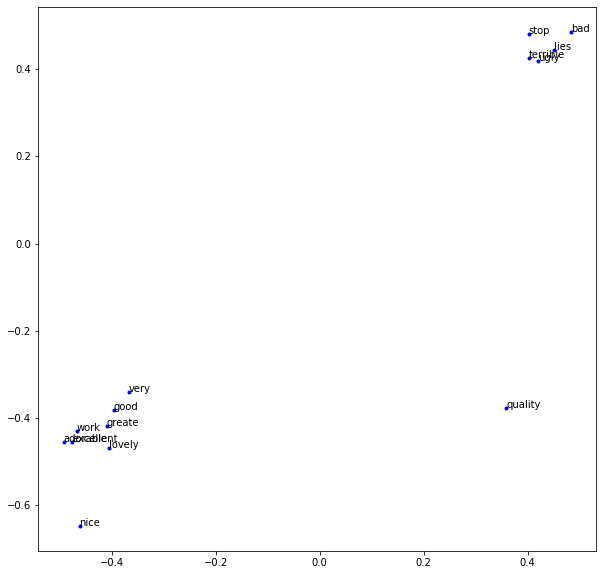

In [ ]:
embd_matrix = embd.get_weights()[0]
print(embd_matrix)
plt.figure(figsize=(10,10))
for idx, (x1, x2) in enumerate(embd_matrix):
    if idx == 0 : continue
    plt.plot(x1, x2, 'b.')
    plt.annotate(tknizr.index_word[idx], (x1,x2 ))

# Embeding Layer를 이용한 IMDB 텍스트 분류 실습


## 데이타 준비

In [ ]:
imdb = tf.keras.datasets.imdb

voca_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=voca_size)
print(f'train set : {len(X_train)}, test set: {len(X_test), }, classes : {max(y_train)+1}')

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


train set : 25000, test set: (25000,), classes : 2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


#### 단어-인덱스 사전 생성

In [ ]:
imdb_word_index = imdb.get_word_index()
imdb_index_word = { idx : key for key, idx in imdb_word_index.items()}
print(X_train[0][:20])

# 0:pad, 1:<start>, 2:UNK 
' '.join([imdb_index_word.get(i-3, '?') for i in X_train[0][:20]])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you"

#### 패딩

In [ ]:
#padding
max_len = 500
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

#### 모델 생성, 훈련, 평가

In [ ]:
model = keras.Sequential([
  keras.layers.Embedding(voca_size, 250, input_length=max_len),                             
  keras.layers.LSTM(120),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid'),
])
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

result = model.evaluate(X_test, y_test)
print(f'cost :{result[0]}, accuracy:{result[1] * 100:.2f}%')

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 250)          2500000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)               178080    
_________________________________________________________________
dense_15 (Dense)             (None, 32)                3872      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 2,681,985
Trainable params: 2,681,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 76s 189ms/step - loss: 0.5204 - acc: 0.7348 - val_loss: 0.3753 - val_acc: 0.8396
Epoch 2/20
391/391 [==============================] - 67s 172ms/step - loss: 0.2832 - acc: 0.8890 - val_lo

# Word2Vec
* 벡터에 단어간 유사도 반영
    * https://word2vec.kr/
    * 엄마-여자+남자=아빠
    * 2가지 방식
        * CBOW(Continuous Bag of Words)
        * Skip-gram 
* Skip-gram 모델
    * window size에 맞게 이웃하는 단어 선택
    * (context, target) 쌍 만들기
* 각 단어를 one-hot encoding으로 변환
* 예) king brave man/ queen beautiful women(window_size=1)
    * king[1,0,0,0,0,0] - brave[0,1,0,0,0,0]
    * brave[0,1,0,0,0,0] - man[0,0,1,0,0,0]
    * brave[0,1,0,0,0,0] - king[1,0,0,0,0,0]
    * queen[0,0,1,0,0,0] - beautiful[0,0,0,0,1,0]
    * beautiful[0,0,0,0,1,0] - women[0,0,0,0,0,1]
    * women[0,0,0,0,0,1] - beautiful[0,0,0,0,1,0]
*  hidden layer가 $n$인 네트워크에 input과 output으로 전달해서 학습
![](https://i.imgur.com/vjVYupm.png)
* 학습한 Weight를 입력 단어에 대한 벡터로 사용
* 예) Hidden-Layer : 2
    * king[1,1]
    * brave[1,2]
    * man[1,3]
    * queen[5,5]
    * beautiful[5,6]
    * women[5,7]

## 학습 데이터 준비

In [ ]:
corpus = ['king is a brave man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results


corpus = remove_stop_words(corpus) # stop word 제거하기
print(corpus)

tknizer = tf.keras.preprocessing.text.Tokenizer()#stop_words)
tknizer.fit_on_texts(corpus)
display(tknizer.get_config())


['king brave man', 'queen wise woman', 'boy young man', 'girl young woman', 'prince young king', 'princess young queen', 'man strong', 'woman pretty', 'prince boy king', 'princess girl queen']


{'char_level': False,
 'document_count': 10,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'index_docs': '{"3": 3, "2": 3, "10": 1, "11": 1, "4": 3, "5": 3, "1": 4, "6": 2, "7": 2, "8": 2, "9": 2, "12": 1, "13": 1}',
 'index_word': '{"1": "young", "2": "king", "3": "man", "4": "queen", "5": "woman", "6": "boy", "7": "girl", "8": "prince", "9": "princess", "10": "brave", "11": "wise", "12": "strong", "13": "pretty"}',
 'lower': True,
 'num_words': None,
 'oov_token': None,
 'split': ' ',
 'word_counts': '{"king": 3, "brave": 1, "man": 3, "queen": 3, "wise": 1, "woman": 3, "boy": 2, "young": 4, "girl": 2, "prince": 2, "princess": 2, "strong": 1, "pretty": 1}',
 'word_docs': '{"man": 3, "king": 3, "brave": 1, "wise": 1, "queen": 3, "woman": 3, "young": 4, "boy": 2, "girl": 2, "prince": 2, "princess": 2, "strong": 1, "pretty": 1}',
 'word_index': '{"young": 1, "king": 2, "man": 3, "queen": 4, "woman": 5, "boy": 6, "girl": 7, "prince": 8, "princess": 9, "brave": 10, "wise": 11, "stro

##  Skip-gram 생성

In [ ]:
WINDOW_SIZE =1

data = []
for sentence in corpus:
    sentence = sentence.split()
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])
data[:5]

[['king', 'brave'],
 ['brave', 'king'],
 ['brave', 'man'],
 ['man', 'brave'],
 ['queen', 'wise']]

## One-hot encoding

In [ ]:
seq = np.array(tknizer.texts_to_sequences(data))
print(seq[:5])

x = seq[:, 0]
y = seq[:, 1]
x_enc = tf.keras.utils.to_categorical(x)
y_enc = tf.keras.utils.to_categorical(y)
print(x_enc[:5], y_enc[:5])

[[ 2 10]
 [10  2]
 [10  3]
 [ 3 10]
 [ 4 11]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


## 모델 생성 및 학습

In [ ]:
dim = max(tknizer.index_word) +1 
print(dim)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, input_shape=(dim,)))
model.add(tf.keras.layers.Dense(dim, activation="softmax"))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(0.05),
              metrics=['accuracy'])
model.fit(x_enc, y, epochs=10000, verbose=2)
model.evaluate(x_enc, y, verbose=1)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
2/2 - 0s - loss: 1.2957 - accuracy: 0.3333
Epoch 7502/10000
2/2 - 0s - loss: 1.2953 - accuracy: 0.3333
Epoch 7503/10000
2/2 - 0s - loss: 1.2931 - accuracy: 0.3611
Epoch 7504/10000
2/2 - 0s - loss: 1.3002 - accuracy: 0.3333
Epoch 7505/10000
2/2 - 0s - loss: 1.3009 - accuracy: 0.3611
Epoch 7506/10000
2/2 - 0s - loss: 1.3030 - accuracy: 0.2778
Epoch 7507/10000
2/2 - 0s - loss: 1.3023 - accuracy: 0.3333
Epoch 7508/10000
2/2 - 0s - loss: 1.3069 - accuracy: 0.3611
Epoch 7509/10000
2/2 - 0s - loss: 1.3056 - accuracy: 0.3611
Epoch 7510/10000
2/2 - 0s - loss: 1.3133 - accuracy: 0.3611
Epoch 7511/10000
2/2 - 0s - loss: 1.3232 - accuracy: 0.3611
Epoch 7512/10000
2/2 - 0s - loss: 1.3094 - accuracy: 0.3611
Epoch 7513/10000
2/2 - 0s - loss: 1.3029 - accuracy: 0.3611
Epoch 7514/10000
2/2 - 0s - loss: 1.3050 - accuracy: 0.3611
Epoch 7515/10000
2/2 - 0s - loss: 1.3097 - accuracy: 0.3611
Epoch 7516/10000
2/2 - 0s - loss: 1.2972 - accuracy: 0.3611
Epoch 7517/10000
2/2 

[1.2892756462097168, 0.3611111044883728]

## 훈련된 Weight로 벡터 만들기

In [ ]:
w = model.layers[0].get_weights()[0]
b = model.layers[0].get_weights()[1]

vectors = w + b
vectors

array([[-0.46183372,  0.11463282],
       [-0.26351726, -1.1263645 ],
       [-2.3404686 ,  2.7308867 ],
       [-1.3495469 ,  4.9199104 ],
       [ 3.092674  ,  0.7288095 ],
       [ 3.1790757 ,  3.5371535 ],
       [-0.7833078 , -0.3434116 ],
       [ 0.7871686 , -0.8042306 ],
       [-1.5279063 ,  1.4723566 ],
       [ 1.5757719 ,  0.22216249],
       [-3.2222586 , -1.5765555 ],
       [ 1.0235922 , -3.655418  ],
       [-3.3881836 , -3.479398  ],
       [-0.4048057 , -4.3874054 ]], dtype=float32)

## vector 시각화, $princess - woman + man$ 계산

Text(2.188154, 1.3481297, 'king-man+woman')

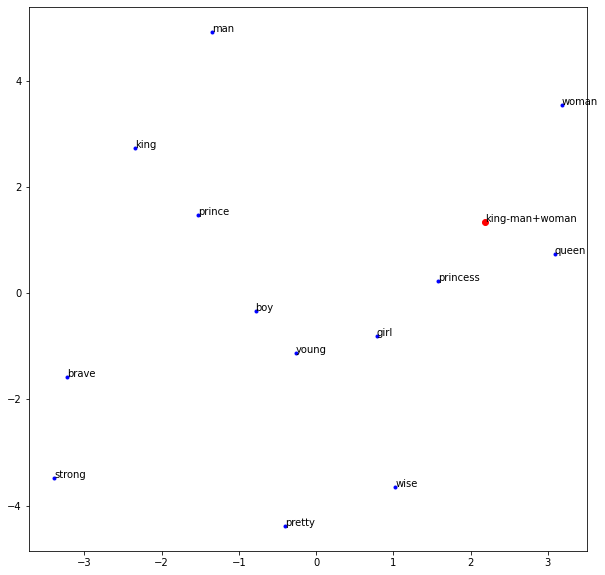

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))  
for idx, (x1, x2) in enumerate(vectors):
    if idx == 0: continue
    plt.plot(x1, x2, 'b.')
    word = tknizer.index_word[idx]
    plt.annotate(word, (x1,x2 ))

king = vectors[tknizer.word_index['king']]
man = vectors[tknizer.word_index['man']]
woman = vectors[tknizer.word_index['woman']]
king_man_woman = king - man + woman

plt.plot(king_man_woman[0],king_man_woman[1], 'ro')
plt.annotate('king-man+woman', king_man_woman)

# 사전 훈련된 Word2Vec 임베딩 사용하기
* Word2Vec
    * Google Tomas Mikolov(토마스 미코로프)
    * gensim : Word2Vec 구현 라이브러리
        * https://radimrehurek.com/gensim/
        * `pip install gensim`
    * 사전 훈련된 가중치
        * https://code.google.com/archive/p/word2vec/
        * https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM
* GloVe
    * Stanford Univ. 2014
    * 사전 훈련된 가중치
        * http://nlp.stanford.edu/data/glove.6B.zip

## gensim 설치

In [ ]:
# not needed for colab
!pip install gensim

## 가중치 파일 다운로드

In [ ]:
import os
file = 'GoogleNews-vectors-negative300.bin.gz'
url = 'https://www.dropbox.com/s/fezr3z4csmv0h90/GoogleNews-vectors-negative300.bin.gz?dl=1'
if os.name =='posix':
  !wget -O $file $url
else:
  !pip install wget
  import wget
  wget.download(url, out=file)

--2022-08-21 12:12:01--  https://www.dropbox.com/s/fezr3z4csmv0h90/GoogleNews-vectors-negative300.bin.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/fezr3z4csmv0h90/GoogleNews-vectors-negative300.bin.gz [following]
--2022-08-21 12:12:02--  https://www.dropbox.com/s/dl/fezr3z4csmv0h90/GoogleNews-vectors-negative300.bin.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbc9b53a9bedae42d6dcf809e5a.dl.dropboxusercontent.com/cd/0/get/BrYyh6PHzCBFSGawvw1A0I7qt-x4M7pE3mO5WUxTw5y_zERKlAd-HVucR6ulSbEgkXLouEqW6eCcmQel3bHXrOo3VTyZcAKRUX4_U5aaI98QT_S_NJ_fMmc93gHYYLm3RyY8PaIjtn1kV4CuWW2VBcHPCibR1F9EHkzMzI839bSTJw/file?dl=1# [following]
--2022-08-21 12:12:02--  https://ucbc9b53a9bedae42d6dcf809e5a.dl.dropboxusercontent.c

## gensim에 가중치 파일 로딩

In [ ]:
import gensim

w2v_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)  
print(w2v_model.vectors.shape)

(3000000, 300)


## 'love' 단어의 벡터 값 보기

In [ ]:
w2v_model['love'][:10]

array([ 0.10302734, -0.15234375,  0.02587891,  0.16503906, -0.16503906,
        0.06689453,  0.29296875, -0.26367188, -0.140625  ,  0.20117188],
      dtype=float32)

# 사전 훈련된 Word2Vec으로 IMDB 분류 실습

## IMDB 데이타 준비

In [ ]:
import tensorflow as tf
import numpy as np
imdb = tf.keras.datasets.imdb

voca_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=voca_size-3) # 0,1,2 자리를 비우려고
print(f'train set : {len(X_train)}, test set: {len(X_test), }, classes : {max(y_train)+1}')

imdb_word_index = imdb.get_word_index()
imdb_index_word = { idx : key for key, idx in imdb_word_index.items()}

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


train set : 25000, test set: (25000,), classes : 2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## 패딩

In [ ]:
max_len = 500
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)
max(X_train.ravel())

9996

## 데이타에 필요한 word2vec 벡터 가져오기
* imdb 데이타와 index 간에 3 차이 보간 필요

In [ ]:
embedd_matrix = np.zeros((voca_size, 300))

for i in range(1, voca_size-3):
    word = imdb_index_word[i]
    if word in w2v_model:
        embedd_matrix[i+3] = w2v_model[word]

## 'love' 단어로 벡터 확인

In [ ]:
print(imdb_word_index['love'])
print(w2v_model['love'][:10])
print(embedd_matrix[116+3][:10])

116
[ 0.10302734 -0.15234375  0.02587891  0.16503906 -0.16503906  0.06689453
  0.29296875 -0.26367188 -0.140625    0.20117188]
[ 0.10302734 -0.15234375  0.02587891  0.16503906 -0.16503906  0.06689453
  0.29296875 -0.26367188 -0.140625    0.20117188]


## 모델 생성, 훈련, 평가

In [ ]:
model = keras.Sequential([
  keras.layers.Embedding(voca_size, 300, weights=[embedd_matrix], trainable=False),
  keras.layers.LSTM(120),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64)

result = model.evaluate(X_test, y_test)
print(f'loss: {result[0]}, accurracy: {result[1]*100:.4f}%')

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 300)         3000000   
_________________________________________________________________
lstm_5 (LSTM)                (None, 120)               202080    
_________________________________________________________________
dense_17 (Dense)             (None, 32)                3872      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 33        
Total params: 3,205,985
Trainable params: 205,985
Non-trainable params: 3,000,000
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 59s 146ms/step - loss: 0.5637 - acc: 0.6992 - val_loss: 0.6514 - val_acc: 0.7116
Epoch 2/20
391/391 [==============================] - 56s 145ms/step - loss: 0.6124 - acc: 0.7033 - 